In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

/kaggle/input/student-performance/Student_Performance.csv
/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv


## <a id="id1">Introduction</a>

we will use the `Linear Regression` algorithm to predict the `Student's Performance` based on some features.

## <a id="id2">Problem Statement</a>

**Why do some students perform better than others?** This question is crucial for educators and policymakers seeking to improve educational outcomes. By analyzing student performance data, we can identify factors influencing academic success and develop targeted interventions to support students at risk of falling behind.

### Details:
- **Objective**: Develop a regression model to estimate final scores.
- **Use Case**: Assist in identifying factors influencing student outcomes, potentially aiding targeted educational interventions.
- **Target Variable**: Performance Index.

In [2]:
# Load the data
Data = pd.read_csv("/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv")

# View the first few rows of the data
Data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
# print the shape of the data
Data.shape

(10000, 6)

In [4]:
# print the columns of the data
print(Data.columns)

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')


In [5]:
# print the data information
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None


## <a id="id5">Exploratory Data Analysis (EDA)</a>

In [6]:
# print the null count for each column
print(Data.isna().sum())

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [7]:
# print the null count for all the data
print(Data.isna().sum().sum())

0


In [8]:
# describe the data
Data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [9]:
# describe the categorical features
Data['Extracurricular Activities'].describe()

count     10000
unique        2
top          No
freq       5052
Name: Extracurricular Activities, dtype: object

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Extracurricular Activities', ylabel='Count'>

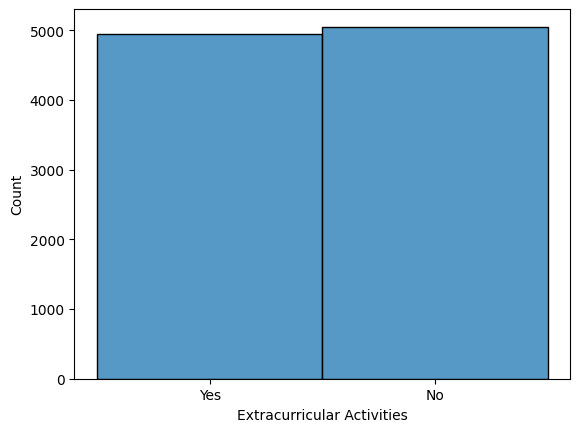

In [10]:
# Plot a histogram for the categorical features
sns.histplot(Data['Extracurricular Activities'])

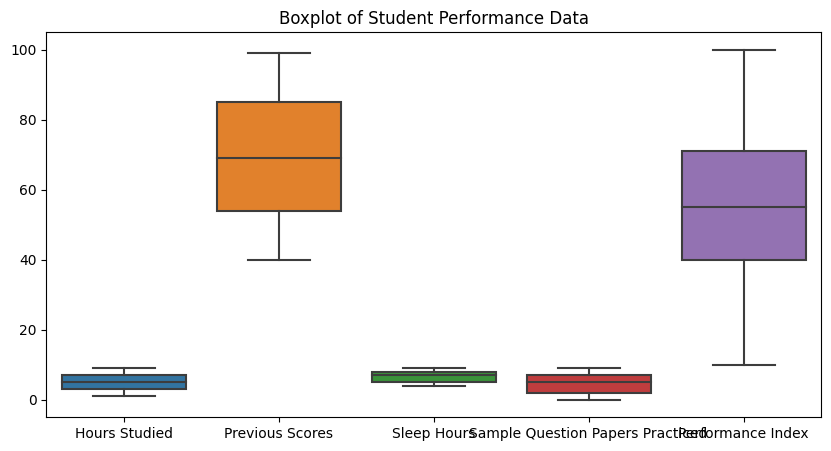

In [11]:
plt.figure(figsize=(10, 5))
plt.title('Boxplot of Student Performance Data')
sns.boxplot(data = Data)  
plt.show()

In [12]:
print(Data['Performance Index'].describe())

count    10000.000000
mean        55.224800
std         19.212558
min         10.000000
25%         40.000000
50%         55.000000
75%         71.000000
max        100.000000
Name: Performance Index, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


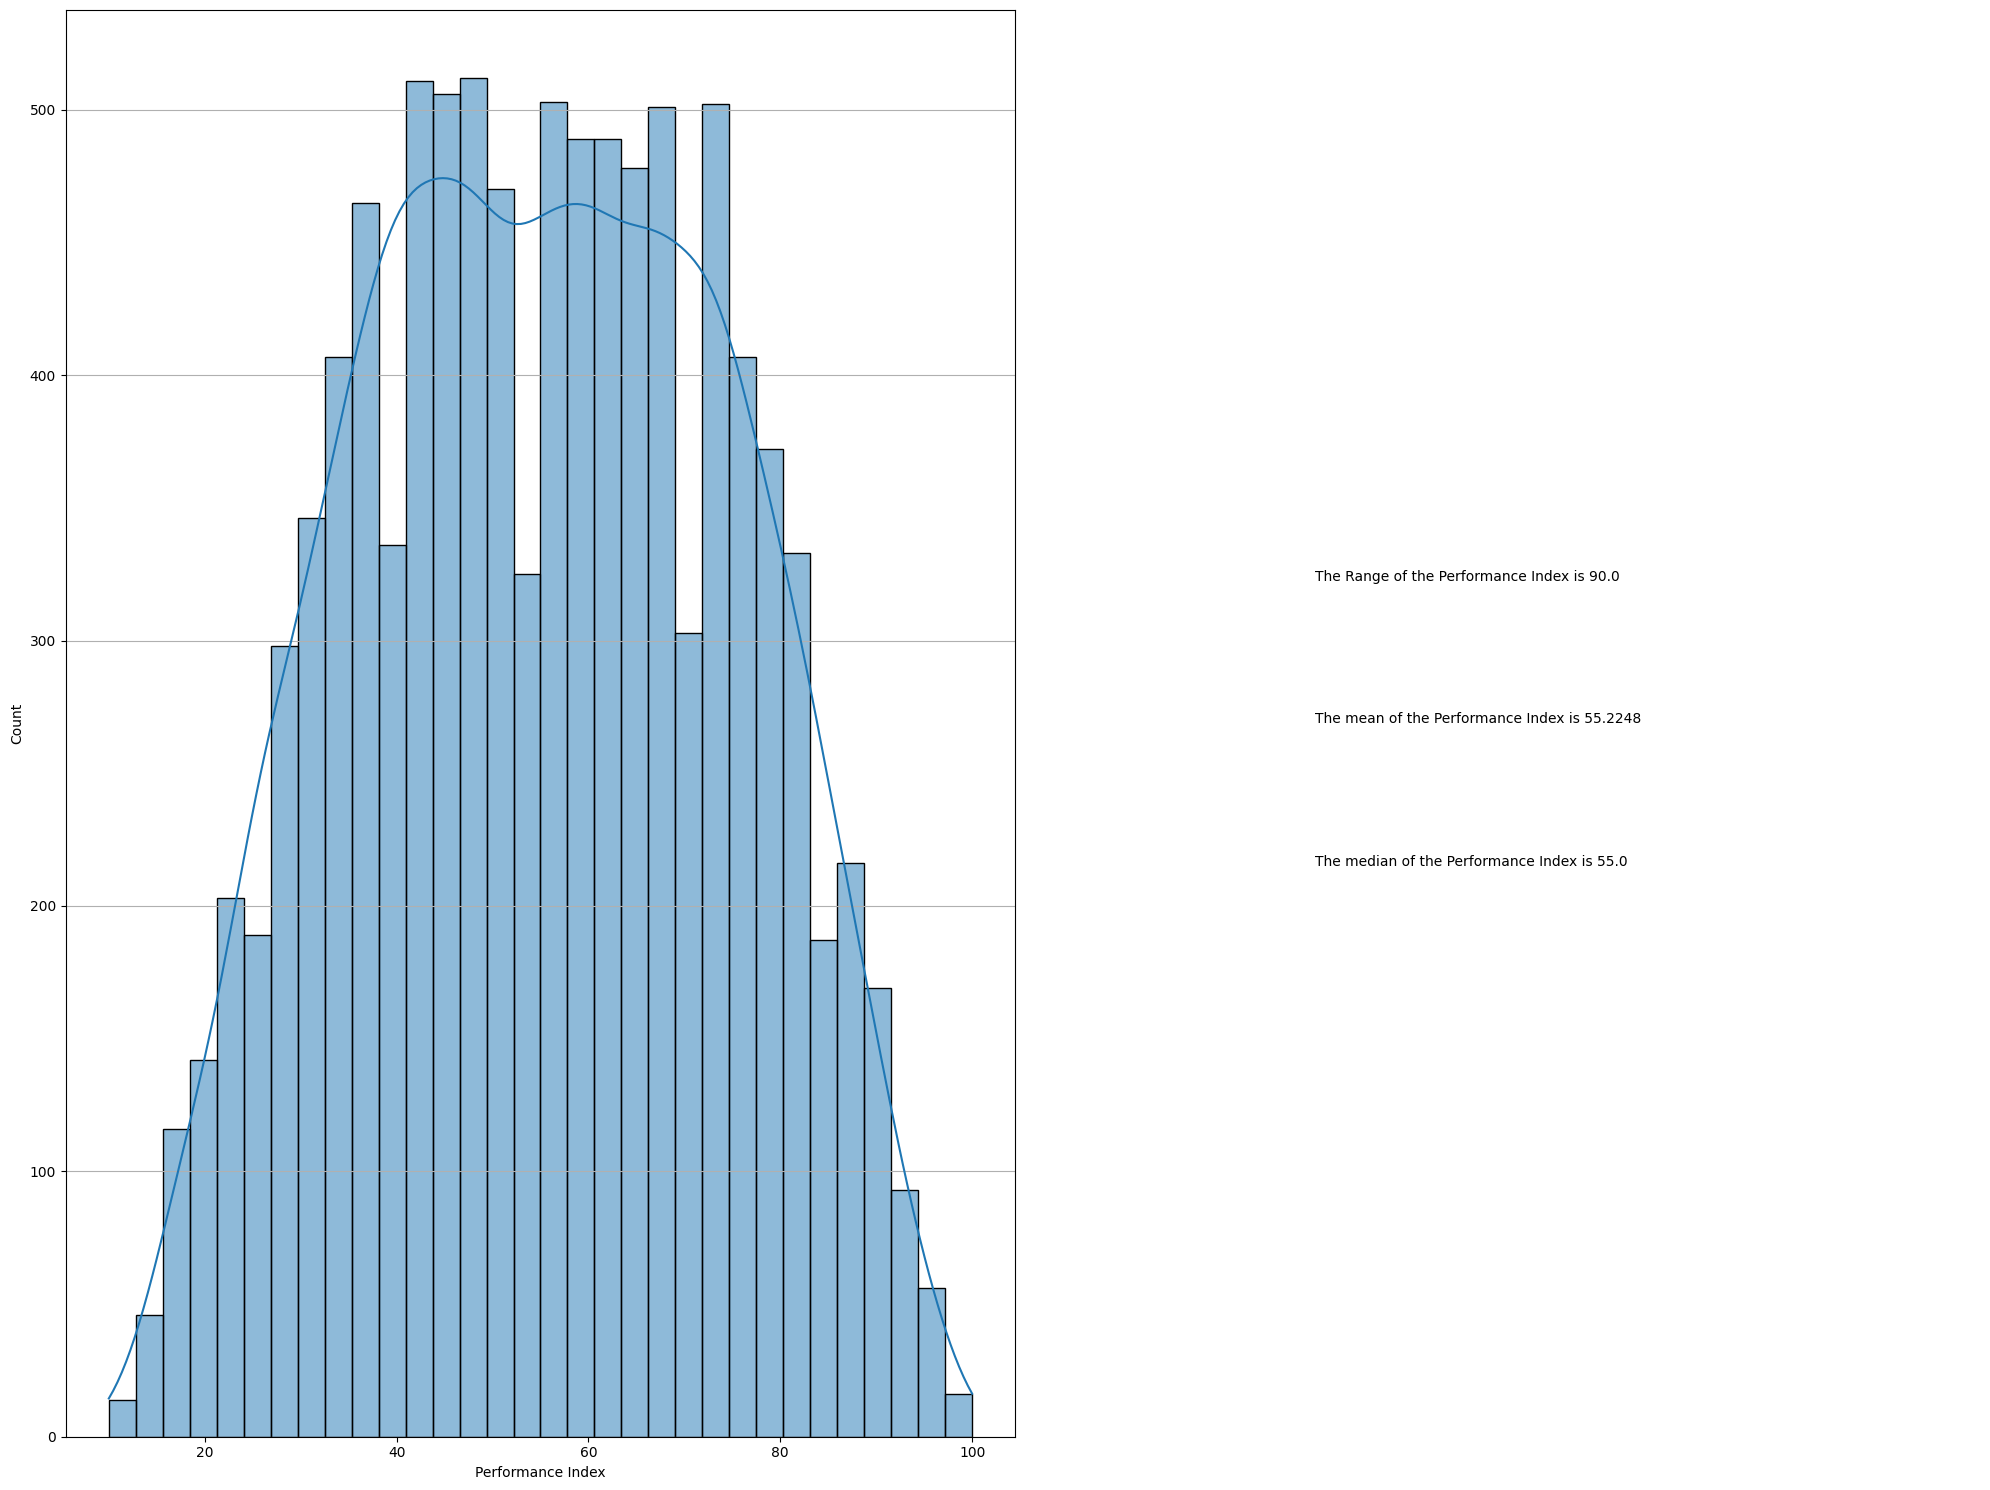

In [13]:
# Plot the distribution of the target variable with kernel density estimation

plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
sns.histplot(Data['Performance Index'],kde=True)
plt.grid(axis='y')

plt.subplot(1,2,2)
plt.text(.3,.5,f"The mean of the Performance Index is {Data['Performance Index'].mean()}",fontsize=10)
plt.text(.3,.4,f"The median of the Performance Index is {Data['Performance Index'].median()}",fontsize=10)
plt.text(.3,.6,f"The Range of the Performance Index is {Data['Performance Index'].max()-Data['Performance Index'].min()}",fontsize=10)
plt.axis('off')
plt.tight_layout()
plt.show()

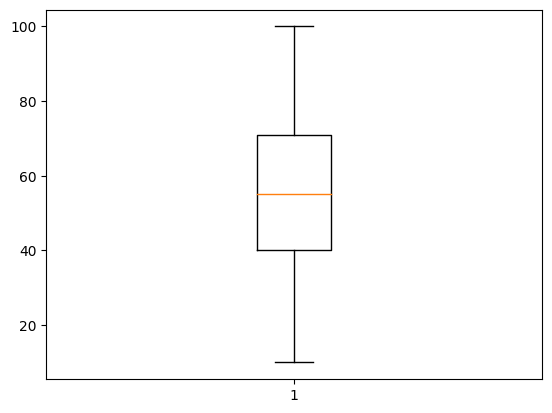

In [14]:
# Plot the boxplot of the target variable
plt.boxplot(Data['Performance Index'])
plt.show()

In [15]:
# Select only numerical columns
numerical_data = Data.select_dtypes(include=['number'])

# Print the first few rows
print(numerical_data.head())

   Hours Studied  Previous Scores  Sleep Hours  \
0              7               99            9   
1              4               82            4   
2              8               51            7   
3              5               52            5   
4              7               75            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [16]:
# Select only numerical columns
numerical_data = Data.select_dtypes(include=['number'])

# discrete numerical columns (less than 11 unique values)
discrete_data = numerical_data.loc[:, numerical_data.nunique() < 11]

# Print the first few rows
print(discrete_data.head())

   Hours Studied  Sleep Hours  Sample Question Papers Practiced
0              7            9                                 1
1              4            4                                 2
2              8            7                                 2
3              5            5                                 2
4              7            8                                 5


In [17]:
# Print the unique values of the discrete data
for col in discrete_data.columns:
    print(f"Unique values in {col}: {discrete_data[col].unique()}\n")

Unique values in Hours Studied: [7 4 8 5 3 6 2 1 9]

Unique values in Sleep Hours: [9 4 7 5 8 6]

Unique values in Sample Question Papers Practiced: [1 2 5 6 0 8 3 4 9 7]



### Visualize Discrete Features with their average Performance Index

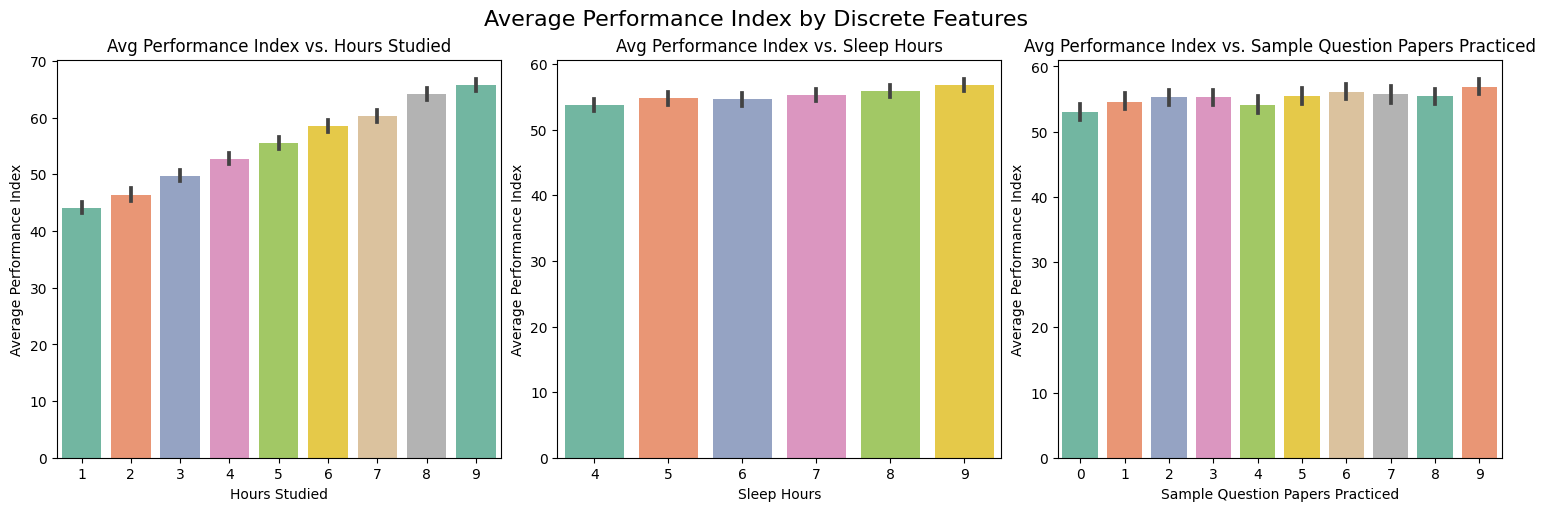

In [18]:
fig, axes = plt.subplots(1, len(discrete_data.columns), figsize=(15, 5), constrained_layout=True)

# Ensure axes is a list (in case of a single feature)
if len(discrete_data.columns) == 1:
    axes = [axes]

fig.suptitle('Average Performance Index by Discrete Features', fontsize=16)

for feature, col in enumerate(discrete_data.columns):
    sns.barplot(data=numerical_data, x=col, y='Performance Index', ax=axes[feature],  palette="Set2")
    axes[feature].set_title(f"Avg Performance Index vs. {col}")
    axes[feature].set_xlabel(col)
    axes[feature].set_ylabel('Average Performance Index')

plt.show()

In [19]:
# Remove the features that having the least impact on the target variable
Data.drop('Sleep Hours' ,axis=1,inplace=True)

In [20]:
# Print the first few rows of the continuous data
print(Data['Performance Index'].head)

<bound method NDFrame.head of 0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64>


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

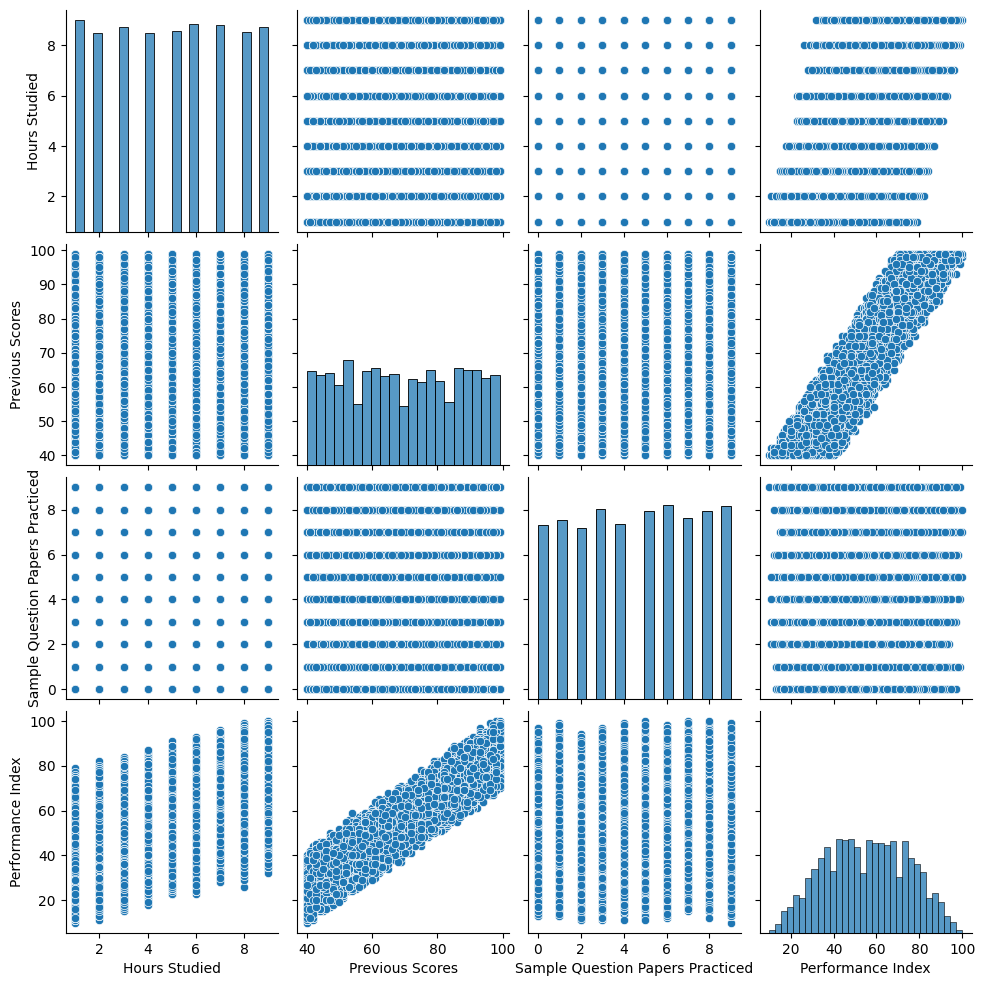

In [21]:
# Plot a scatter for each feature against the other features (pairplot)
sns.pairplot(Data)

# show the plot
plt.show()

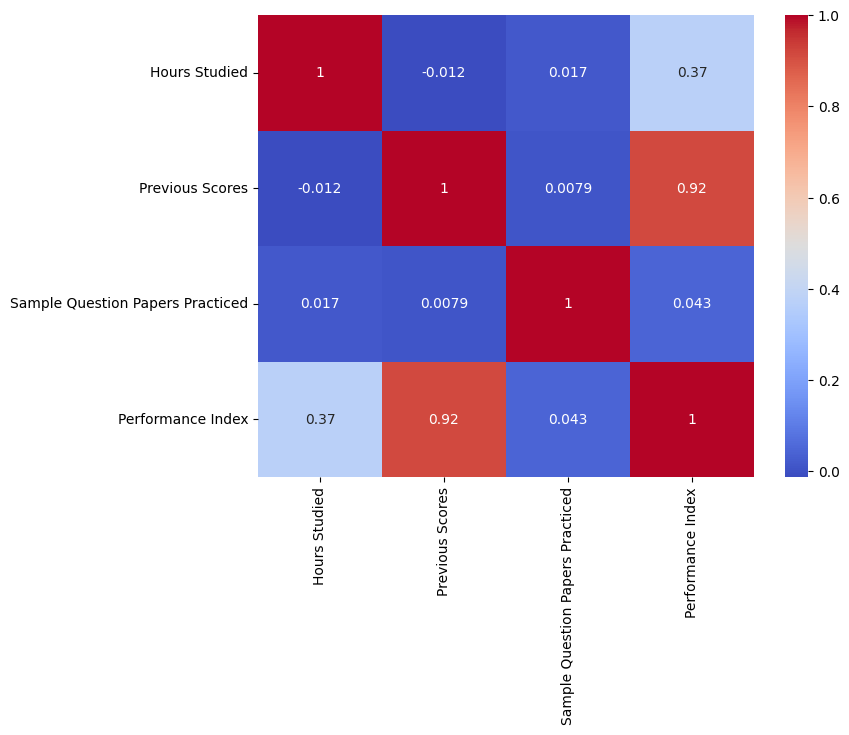

In [22]:
# Plot the correlation matrix of the continuous data
cons_numerical = Data.select_dtypes(include=['number']) 
correlation_matrix = cons_numerical.corr()
plt.figure(figsize = (8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [23]:
# select the categorical data
categorical_data = Data.select_dtypes(include=['object', 'category'])

# Merge the categorical data with the target variable
merged_data = categorical_data.join(Data['Performance Index'])

# print the first few rows of the categorical data
print(merged_data.head())

  Extracurricular Activities  Performance Index
0                        Yes               91.0
1                         No               65.0
2                        Yes               45.0
3                        Yes               36.0
4                         No               66.0


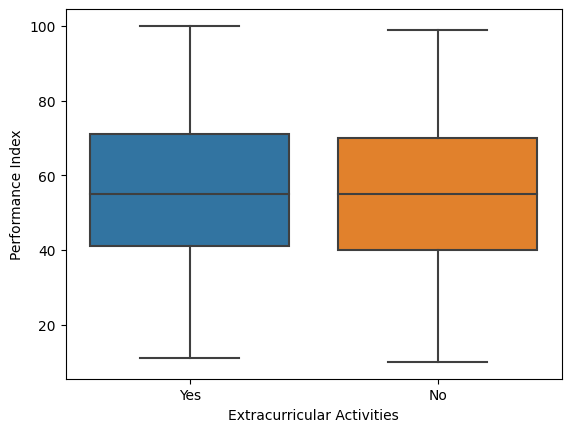

In [24]:
# Plot box plots of the categorical data against the target variable
sns.boxplot(data=merged_data ,x='Extracurricular Activities',y='Performance Index')
plt.show()

In [25]:
# Convert the categorical data to numerical data using one-hot encoding

categorical_columns = Data.select_dtypes(include=['object']).columns.tolist()

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(Data[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([Data, one_hot_df], axis=1)
df_encoded = df_encoded.drop(columns=categorical_columns)

print("Encoded Extracurricular Activities:\n\n", df_encoded.head())



Encoded Extracurricular Activities:

    Hours Studied  Previous Scores  Sample Question Papers Practiced  \
0              7               99                                 1   
1              4               82                                 2   
2              8               51                                 2   
3              5               52                                 2   
4              7               75                                 5   

   Performance Index  Extracurricular Activities_No  \
0               91.0                            0.0   
1               65.0                            1.0   
2               45.0                            0.0   
3               36.0                            0.0   
4               66.0                            1.0   

   Extracurricular Activities_Yes  
0                             1.0  
1                             0.0  
2                             1.0  
3                             1.0  
4                       

In [26]:
# Select the features and put them in X
X = Data[['Hours Studied', 'Previous Scores', 'Sample Question Papers Practiced']]

# Select the target variable and put it in y
y = Data['Performance Index']

## <a id="id7">Modeling</a>

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [28]:
# Print the model parameters
print("Intercept (Bias):", model.intercept_)
print("Coefficients (Weights):", model.coef_)


Intercept (Bias): -30.516684600798932
Coefficients (Weights): [2.85512917 1.01702786 0.19178987]


In [29]:
print("R^2 Score (Training Data):", model.score(X_train,y_train)*100)

R^2 Score (Training Data): 98.66861016208229


 ## <a id="id8">Testing</a>

In [30]:
# Predict the target variable on the testing data
Predict_y = model.predict(X_test)
print('The first few predictions is ' , Predict_y[:5] , '\n')
print('The first few predictions is ' , y_test[:5] , '\n')

The first few predictions is  [54.31746343 23.51117432 47.38172918 30.28820995 44.52243546] 

The first few predictions is  6252    51.0
4684    20.0
1731    46.0
4742    28.0
4521    41.0
Name: Performance Index, dtype: float64 



## <a id="id9">Evaluation</a>

In [31]:
print('The Mean Squared Error = ' , mean_squared_error(y_test,Predict_y))

The Mean Squared Error =  4.862364811169543


In [32]:
print('The R^2  = ' , r2_score(y_test,Predict_y)*100 , '%')

The R^2  =  98.68792226097673 %


In [33]:
X_test_df = pd.DataFrame(X_test, columns=['Hours Studied', 'Previous Scores', 'Sample Question Papers Practiced'])
output = X_test_df.copy()
output['Performance Index'] = Predict_y
output.to_csv('prediction.csv', index=False)
print("CSV file saved successfully!")

CSV file saved successfully!
